# **Esercizio Scikit-Learn**

1. Carica il dataset Iris.

In [8]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data 
y = data.target

2. Standardizza le caratteristiche utilizzando StandardScaler.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Suddividi i dati in training e test set (70% training, 30% test).


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

4. Applica l'algoritmo DecisionTreeClassifier.

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

5. Valuta la performance del modello utilizzando il classification_report(precisione, recall, F1-score).

In [23]:
from sklearn.metrics import classification_report
metrics = classification_report(y_test, y_pred)

In [24]:
print(metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        14
           2       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



6. Visualizza la matrice di confusione.

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
cm = confusion_matrix(y_test, y_pred)

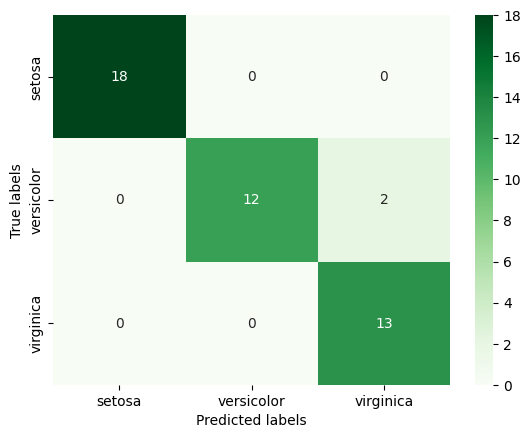

In [29]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
plt.show()

In [ ]:
class classificazione_alberi_decisionali:
    
    def __init__(self, data, target):
        self.data=data
        self.target=target

    def standardizzazione(self):
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(self.data)
        return X_scaled
    
    def splitting(self, testsize):
        X_scaled=classificazione_alberi_decisionali.standardizzazione(self)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, self.target, test_size=testsize)
        return X_train, X_test, y_train, y_test
    
    def alberidecisionali(X_train, X_test, y_train):
        model = DecisionTreeClassifier()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return y_pred
    
    def metriche(y_test,y_pred):
        metrics = classification_report(y_test, y_pred)
        return metrics
    
    def visualizzarematricediconfusione(self, y_test,y_pred):
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=self.data.target_names, yticklabels=self.data.target_names)
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        plt.show()